# AutoScout regression with regularization

Regression models (linear, ridge, lasso, elastic, random forest, xgb) were created and compared. 

- Linear model (linear, ridge, lasso, elastic) performance metrics are almost identical with no visible effect of regularization.
- Cross validation for linear regression returns random exploding rms errors!!!
- The only performance increase in linear model comes from log transformation of the label feature (price)! (R2 = from 0.89 to 0.92)
- Random Forest and XGB Regression perform similarly, while XGB is easier to train without further tuning.
- Feature importance values are similar from two different approaches.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [18]:
df = pd.read_csv("final_no_dummies.csv")

In [19]:
df.head()

price  make model  mileage  first_registration  power  prev_owner  \
0  15770.0  Audi    A1    56013                2016     66           2   
1  14500.0  Audi    A1    80000                2017    141           1   
2  14640.0  Audi    A1    83450                2016     85           1   
3  14500.0  Audi    A1    73000                2016     66           1   
4  16790.0  Audi    A1    16200                2016     66           1   

                vat body_type       gear  nr_of_doors  nr_of_seats  cylinders  \
0    VAT deductible    Sedans  Automatic            5            5        3.0   
1  Price negotiable    Sedans  Automatic            3            4        4.0   
2    VAT deductible    Sedans  Automatic            4            4        3.0   
3  Price negotiable    Sedans  Automatic            3            4        3.0   
4  Price negotiable    Sedans  Automatic            5            5        3.0   

  inspection_new body_color paint_type     fuel  type emission_class  \
0            Yes      Black   Metallic   Diesel  Used         Euro 6   
1             No        Red   Metallic  Benzine  Used         Euro 6   
2             No      Black   Metallic   Diesel  Used         Euro 6   
3             No      other   Metallic   Diesel  Used         Euro 6   
4            Yes      Black   Metallic   Diesel  Used         Euro 6   

   displacement  consumption    co2  gears  cc Air conditioning  \
0        1422.0          4.2   99.0    5.0                    1   
1        1798.0          5.6  129.0    7.0                    1   
2        1598.0          4.2   99.0    5.0                    1   
3        1422.0          4.2   99.0    6.0                    0   
4        1422.0          4.1  109.0    5.0                    1   

   cc Air suspension  cc Armrest  cc Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc Auxiliary heating  cc Cruise control  cc Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc Electric tailgate  cc Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc Electrically adjustable seats  cc Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc Heads-up display  cc Heated steering wheel  cc Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc Keyless central door lock  cc Leather seats  cc Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2           

In [20]:
df = pd.get_dummies(df, drop_first=False)

In [21]:
df.head()

price  mileage  first_registration  power  prev_owner  nr_of_doors  \
0  15770.0    56013                2016     66           2            5   
1  14500.0    80000                2017    141           1            3   
2  14640.0    83450                2016     85           1            4   
3  14500.0    73000                2016     66           1            3   
4  16790.0    16200                2016     66           1            5   

   nr_of_seats  cylinders  displacement  consumption    co2  gears  \
0            5        3.0        1422.0          4.2   99.0    5.0   
1            4        4.0        1798.0          5.6  129.0    7.0   
2            4        3.0        1598.0          4.2   99.0    5.0   
3            4        3.0        1422.0          4.2   99.0    6.0   
4            5        3.0        1422.0          4.1  109.0    5.0   

   cc Air conditioning  cc Air suspension  cc Armrest  \
0                    1                  0           1   
1                    1                  0           0   
2                    1                  0           0   
3                    0                  1           1   
4                    1                  0           1   

   cc Automatic climate control  cc Auxiliary heating  cc Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   cc Electric Starter  cc Electric tailgate  cc Electrical side mirrors  \
0                    0                     0                           1   
1                    0                     0                           0   
2                    0                     0                           1   
3                    0                     0                           1   
4                    0                     0                           1   

   cc Electrically adjustable seats  cc Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc Heads-up display  cc Heated steering wheel  cc Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc Keyless central door lock  cc Leather seats  cc Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc Light sensor  cc Lumbar support  cc Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc Multi-function steering wheel  cc Navigation system  cc Panorama roof  \
0                                 1                     1                 0   
1                           

In [24]:
X = df.drop("price", axis =1)
y = df["price"]

In [23]:
X.shape

(15884, 168)

### Train | Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

## Scaling the Data

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [50]:
scaler.fit(X_train)

MinMaxScaler()

In [51]:
X_train_scaled = scaler.transform(X_train)
#X_train_scaled

In [52]:
X_test_scaled = scaler.transform(X_test)
#X_test_scaled

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [54]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [57]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

linear_train   linear_test
R2    8.991337e-01  8.888443e-01
mae   1.615731e+03  1.744978e+03
mse   5.355365e+06  6.433903e+06
rmse  2.314166e+03  2.536514e+03

In [58]:
lm.intercept_

32824369469307.81

## Multicolinearity

In [59]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [60]:
pd.DataFrame(X).corr().style.applymap(color_red)

## Cross Validate

In [61]:
from sklearn.model_selection import cross_validate, cross_val_score

In [62]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [63]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time       test_r2  test_neg_mean_absolute_error  \
1  0.078810    0.003167  8.935204e-01                 -1.680825e+03   
2  0.056464    0.001283  8.971698e-01                 -1.596300e+03   
3  0.041220    0.000958  8.965096e-01                 -1.675886e+03   
4  0.066144    0.000977  8.970868e-01                 -1.635159e+03   
5  0.065490    0.001146 -5.642985e+13                 -1.153587e+09   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -5.830844e+06                     -2.414714e+03  
2                -5.077664e+06                     -2.253367e+03  
3                -5.626224e+06                     -2.371966e+03  
4                -5.599854e+06                     -2.366401e+03  
5                -2.958276e+21                     -5.439003e+10

In [64]:
scores = pd.DataFrame(scores, index=range(1,6)) # some of the runs ended up with exploding error values???
scores.iloc[:, 2:].mean()

test_r2                            -1.128597e+13
test_neg_mean_absolute_error       -2.307186e+08
test_neg_mean_squared_error        -5.916551e+20
test_neg_root_mean_squared_error   -1.087801e+10
dtype: float64

In [65]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train   linear_test
R2    8.991337e-01  8.888443e-01
mae   1.615731e+03  1.744978e+03
mse   5.355365e+06  6.433903e+06
rmse  2.314166e+03  2.536514e+03

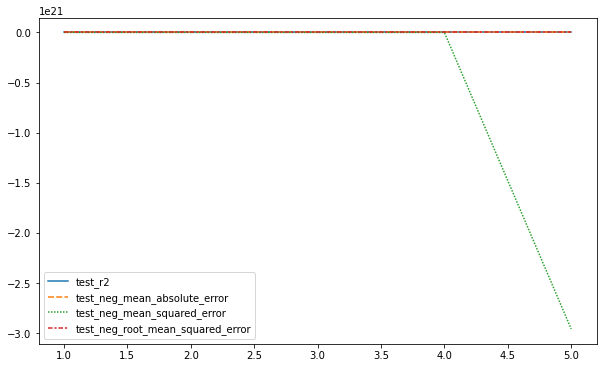

In [66]:
sns.lineplot(data = scores.iloc[:,2:]);

In [67]:
lm.coef_

array([-1.25928496e+04,  3.98418623e+03,  2.01537845e+04, -2.33327260e+03,
        1.05214713e+03,  5.46523603e+02, -2.18187980e+02, -1.35292854e+03,
        4.20145578e+03, -2.32384054e+02,  7.60655656e+02,  4.84626883e+02,
        4.05321358e+02, -5.10139718e+01,  2.63633280e+02, -4.30379324e+02,
        2.35292239e+02, -4.91036602e+02, -1.89791554e+02,  1.61044050e+02,
        6.09707851e+01,  4.72837395e+02,  2.40474048e+03,  2.27165842e+02,
        1.99454124e+02,  1.21728783e+02, -1.29211660e+03,  1.59710081e+02,
        1.97733089e+02, -2.31178777e+02,  5.33893057e+02,  1.01649216e+02,
        2.59305586e+02, -3.89700531e+02,  5.07330250e+02,  9.62756992e+00,
        7.28985225e+02,  2.48738099e+02, -4.79700699e+02,  1.35410329e+02,
       -1.79972254e+02, -4.76585712e+01,  6.85385082e+02, -1.72085588e+02,
        8.80469165e+01,  9.74659793e+02,  7.58641602e+01, -6.62323747e+02,
       -4.92437826e+02, -6.39431716e+02,  6.38244175e+01,  9.20375828e+02,
        1.37242507e+02, -

In [68]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0   -1.259285e+04
1    3.984186e+03
2    2.015378e+04
3   -2.333273e+03
4    1.052147e+03
..            ...
163  8.392889e+13
164  8.392889e+13
165  8.392889e+13
166  8.392889e+13
167  8.392889e+13

[168 rows x 1 columns]

## Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridge_model = Ridge(alpha=1, random_state=42)

In [71]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [72]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [73]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train    ridge_test
R2    8.990867e-01  8.885720e-01
mae   1.614433e+03  1.743939e+03
mse   5.357858e+06  6.449660e+06
rmse  2.314705e+03  2.539618e+03

In [74]:
pd.concat([ls, rs], axis=1)

linear_train   linear_test   ridge_train    ridge_test
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03

In [76]:
ridge_model.coef_

array([-1.23291522e+04,  4.04301042e+03,  1.90000916e+04, -2.29753018e+03,
        1.04327694e+03,  5.50022003e+02, -2.50741247e+02, -8.88860541e+02,
        4.16585533e+03, -1.34866761e+02,  7.76935667e+02,  4.88480881e+02,
        3.93590352e+02, -4.91441852e+01,  2.67031554e+02, -4.29528598e+02,
        2.30326767e+02, -2.44841433e+02, -1.88825365e+02,  1.57824263e+02,
        6.28446582e+01,  4.62055009e+02,  2.40036267e+03,  2.16224122e+02,
        1.96441008e+02,  1.24113757e+02, -1.23940119e+03,  1.56543431e+02,
        2.03413190e+02, -2.35984406e+02,  5.37091789e+02,  1.00450329e+02,
        2.64610446e+02, -3.83493955e+02,  5.12481932e+02,  1.44280048e+01,
        7.25371193e+02,  2.48740749e+02, -4.84212082e+02,  1.26142777e+02,
       -1.75949369e+02, -4.03831898e+01,  6.82190912e+02, -1.66371067e+02,
        1.02189795e+02,  9.77215743e+02,  7.32813063e+01, -6.65640374e+02,
       -4.07673090e+02, -6.38321899e+02,  6.18536899e+01,  9.29374273e+02,
        1.39062485e+02, -

## For Ridge Regression CV with alpha : 1 

In [77]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [78]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.031921    0.001606  0.893701                  -1676.113770   
2  0.022604    0.001007  0.896985                  -1595.671703   
3  0.018701    0.000960  0.896670                  -1673.336060   
4  0.022299    0.001311  0.897391                  -1631.661267   
5  0.021274    0.000859  0.886249                  -1655.066918   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -5.820945e+06                      -2412.663434  
2                -5.086798e+06                      -2255.392990  
3                -5.617514e+06                      -2370.129554  
4                -5.583286e+06                      -2362.897878  
5                -5.963290e+06                      -2441.984915

In [79]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             8.941992e-01
test_neg_mean_absolute_error       -1.646370e+03
test_neg_mean_squared_error        -5.614367e+06
test_neg_root_mean_squared_error   -2.368614e+03
dtype: float64

In [80]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

ridge_train    ridge_test
R2    8.990867e-01  8.885720e-01
mae   1.614433e+03  1.743939e+03
mse   5.357858e+06  6.449660e+06
rmse  2.314705e+03  2.539618e+03

<AxesSubplot:>

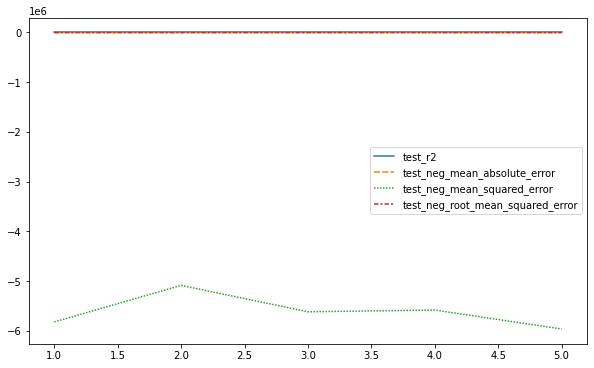

In [81]:
sns.lineplot(data = scores.iloc[:,2:])

In [82]:
ridge_model.coef_

array([-1.23291522e+04,  4.04301042e+03,  1.90000916e+04, -2.29753018e+03,
        1.04327694e+03,  5.50022003e+02, -2.50741247e+02, -8.88860541e+02,
        4.16585533e+03, -1.34866761e+02,  7.76935667e+02,  4.88480881e+02,
        3.93590352e+02, -4.91441852e+01,  2.67031554e+02, -4.29528598e+02,
        2.30326767e+02, -2.44841433e+02, -1.88825365e+02,  1.57824263e+02,
        6.28446582e+01,  4.62055009e+02,  2.40036267e+03,  2.16224122e+02,
        1.96441008e+02,  1.24113757e+02, -1.23940119e+03,  1.56543431e+02,
        2.03413190e+02, -2.35984406e+02,  5.37091789e+02,  1.00450329e+02,
        2.64610446e+02, -3.83493955e+02,  5.12481932e+02,  1.44280048e+01,
        7.25371193e+02,  2.48740749e+02, -4.84212082e+02,  1.26142777e+02,
       -1.75949369e+02, -4.03831898e+01,  6.82190912e+02, -1.66371067e+02,
        1.02189795e+02,  9.77215743e+02,  7.32813063e+01, -6.65640374e+02,
       -4.07673090e+02, -6.38321899e+02,  6.18536899e+01,  9.29374273e+02,
        1.39062485e+02, -

In [83]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [84]:
pd.concat([lm_df,rm_df], axis = 1)

lm_coef  ridge_coef_1
0   -1.259285e+04 -12329.152166
1    3.984186e+03   4043.010420
2    2.015378e+04  19000.091592
3   -2.333273e+03  -2297.530179
4    1.052147e+03   1043.276941
..            ...           ...
163  8.392889e+13   -594.674340
164  8.392889e+13   -117.195414
165  8.392889e+13    720.725399
166  8.392889e+13     75.676115
167  8.392889e+13    -84.531760

[168 rows x 2 columns]

## Choosing best alpha value with Cross-Validation

In [85]:
from sklearn.linear_model import RidgeCV

In [86]:
alpha_space = np.linspace(0.1, 5, 50)
alpha_space

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [87]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [88]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [89]:
ridge_cv_model.alpha_

0.8

In [90]:
ridge_cv_model.best_score_

-2368.560154089858

In [91]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [95]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

ridge_cv_train  ridge_cv_test
R2      8.991027e-01   8.886305e-01
mae     1.614612e+03   1.744116e+03
mse     5.357010e+06   6.446278e+06
rmse    2.314522e+03   2.538952e+03

In [96]:
pd.concat([ls, rs, rcs], axis = 1)

linear_train   linear_test   ridge_train    ridge_test  ridge_cv_train  \
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01    8.991027e-01   
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03    1.614612e+03   
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06    5.357010e+06   
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03    2.314522e+03   

      ridge_cv_test  
R2     8.886305e-01  
mae    1.744116e+03  
mse    6.446278e+06  
rmse   2.538952e+03

In [97]:
ridge_cv_model.coef_

array([-1.23803064e+04,  4.03163714e+03,  1.92177513e+04, -2.30483028e+03,
        1.04501367e+03,  5.49195336e+02, -2.44792186e+02, -9.75745237e+02,
        4.17333031e+03, -1.53668101e+02,  7.73658237e+02,  4.87841357e+02,
        3.96206823e+02, -4.95061076e+01,  2.66394280e+02, -4.29738062e+02,
        2.31246932e+02, -2.72069709e+02, -1.89013785e+02,  1.58483793e+02,
        6.24557070e+01,  4.64121477e+02,  2.40123415e+03,  2.18274852e+02,
        1.97044301e+02,  1.23680313e+02, -1.24956047e+03,  1.57131766e+02,
        2.02321467e+02, -2.35107703e+02,  5.36554733e+02,  1.00675153e+02,
        2.63597124e+02, -3.84705948e+02,  5.11475111e+02,  1.35071341e+01,
        7.26124562e+02,  2.48741711e+02, -4.83382975e+02,  1.27877149e+02,
       -1.76713993e+02, -4.17516746e+01,  6.82807650e+02, -1.67430421e+02,
        9.95183475e+01,  9.76879906e+02,  7.37138136e+01, -6.65953254e+02,
       -4.21944929e+02, -6.38520253e+02,  6.22395343e+01,  9.27716826e+02,
        1.38709066e+02, -

In [98]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.36"])

In [99]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.36
0   -1.259285e+04 -12329.152166       -12380.306359
1    3.984186e+03   4043.010420         4031.637139
2    2.015378e+04  19000.091592        19217.751308
3   -2.333273e+03  -2297.530179        -2304.830281
4    1.052147e+03   1043.276941         1045.013669
..            ...           ...                 ...
163  8.392889e+13   -594.674340         -595.823789
164  8.392889e+13   -117.195414         -117.047666
165  8.392889e+13    720.725399          720.815177
166  8.392889e+13     75.676115           76.691719
167  8.392889e+13    -84.531760          -84.635442

[168 rows x 3 columns]

## LASSO

In [100]:
from sklearn.linear_model import Lasso, LassoCV

In [101]:
lasso_model = Lasso(alpha=10, random_state=42, max_iter=5000)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=10, max_iter=5000, random_state=42)

In [102]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [103]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train    lasso_test
R2    8.946936e-01  8.853499e-01
mae   1.622934e+03  1.743957e+03
mse   5.591104e+06  6.636161e+06
rmse  2.364551e+03  2.576075e+03

In [104]:
pd.concat([ls, rs, rcs, lss], axis = 1)

linear_train   linear_test   ridge_train    ridge_test  ridge_cv_train  \
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01    8.991027e-01   
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03    1.614612e+03   
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06    5.357010e+06   
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03    2.314522e+03   

      ridge_cv_test   lasso_train    lasso_test  
R2     8.886305e-01  8.946936e-01  8.853499e-01  
mae    1.744116e+03  1.622934e+03  1.743957e+03  
mse    6.446278e+06  5.591104e+06  6.636161e+06  
rmse   2.538952e+03  2.364551e+03  2.576075e+03

In [105]:
lasso_model.coef_

array([-1.03534509e+04,  4.68406232e+03,  1.79022540e+04, -1.17026577e+03,
        7.65643453e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.48144536e+03,  0.00000000e+00,  8.45818011e+02,  1.72196348e+02,
       -0.00000000e+00,  0.00000000e+00,  3.09116780e+02, -0.00000000e+00,
        1.44502364e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.95644625e+01,  2.95677169e+02,  2.37088376e+03,  8.25840945e+01,
        1.13305266e+02,  7.94395667e+01, -0.00000000e+00,  1.39048654e+02,
        8.47245251e+01, -1.55540041e+02,  5.81472696e+01,  0.00000000e+00,
        2.69139989e+02, -0.00000000e+00,  3.32703273e+02,  0.00000000e+00,
        6.56036644e+02,  1.62773400e+02, -1.27349037e+02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.29748131e+02, -3.22642134e+01,
        4.77759870e+01,  4.41858889e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.57383241e+02,  0.00000000e+00,  8.50612925e+02,
        0.00000000e+00, -

## For Lasso CV with Default Alpha : 1

In [106]:
model = Lasso(alpha=1, random_state=42, max_iter=5000)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [107]:
pd.DataFrame(scores, index = range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.506814    0.001574  0.894090                  -1672.200223   
2  0.513567    0.000935  0.897698                  -1588.719989   
3  0.462009    0.001141  0.896706                  -1672.861493   
4  0.443868    0.001420  0.897673                  -1630.376509   
5  0.453602    0.001171  0.886454                  -1651.867745   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -5.799667e+06                      -2408.249865  
2                -5.051597e+06                      -2247.575882  
3                -5.615557e+06                      -2369.716556  
4                -5.567975e+06                      -2359.655610  
5                -5.952541e+06                      -2439.782909

In [108]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             8.945239e-01
test_neg_mean_absolute_error       -1.643205e+03
test_neg_mean_squared_error        -5.597467e+06
test_neg_root_mean_squared_error   -2.364996e+03
dtype: float64

In [109]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

lasso_train    lasso_test
R2    8.946936e-01  8.853499e-01
mae   1.622934e+03  1.743957e+03
mse   5.591104e+06  6.636161e+06
rmse  2.364551e+03  2.576075e+03

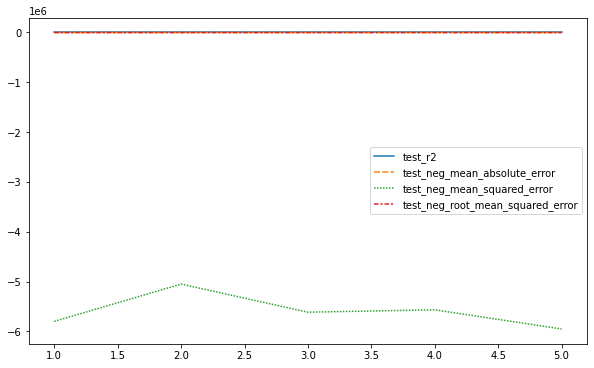

In [110]:
sns.lineplot(data = scores.iloc[:,2:]);

In [111]:
lasso_model.coef_

array([-1.03534509e+04,  4.68406232e+03,  1.79022540e+04, -1.17026577e+03,
        7.65643453e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.48144536e+03,  0.00000000e+00,  8.45818011e+02,  1.72196348e+02,
       -0.00000000e+00,  0.00000000e+00,  3.09116780e+02, -0.00000000e+00,
        1.44502364e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.95644625e+01,  2.95677169e+02,  2.37088376e+03,  8.25840945e+01,
        1.13305266e+02,  7.94395667e+01, -0.00000000e+00,  1.39048654e+02,
        8.47245251e+01, -1.55540041e+02,  5.81472696e+01,  0.00000000e+00,
        2.69139989e+02, -0.00000000e+00,  3.32703273e+02,  0.00000000e+00,
        6.56036644e+02,  1.62773400e+02, -1.27349037e+02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  6.29748131e+02, -3.22642134e+01,
        4.77759870e+01,  4.41858889e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.57383241e+02,  0.00000000e+00,  8.50612925e+02,
        0.00000000e+00, -

In [112]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

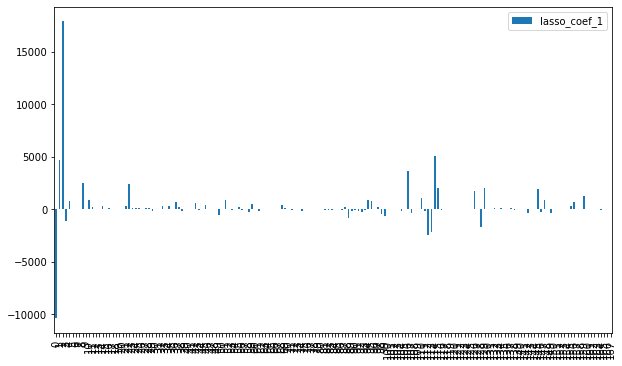

In [113]:
lsm_df.plot(kind="bar");

In [114]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.36  lasso_coef_1
0   -1.259285e+04 -12329.152166       -12380.306359 -10353.450948
1    3.984186e+03   4043.010420         4031.637139   4684.062325
2    2.015378e+04  19000.091592        19217.751308  17902.253983
3   -2.333273e+03  -2297.530179        -2304.830281  -1170.265765
4    1.052147e+03   1043.276941         1045.013669    765.643453
..            ...           ...                 ...           ...
163  8.392889e+13   -594.674340         -595.823789     -0.000000
164  8.392889e+13   -117.195414         -117.047666    -72.655428
165  8.392889e+13    720.725399          720.815177      0.000000
166  8.392889e+13     75.676115           76.691719      0.000000
167  8.392889e+13    -84.531760          -84.635442     -0.000000

[168 rows x 4 columns]

### Choosing best alpha value with Cross-Validation

In [115]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=10000, random_state=42)

In [116]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
        cv=5, max_iter=10000, random_state=42)

In [117]:
lasso_cv_model.alpha_

0.8

In [1696]:
#np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

In [118]:
alpha_space[::-1]

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2,
       1.1, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

In [124]:
#mse score for CV
np.sqrt(lasso_cv_model.mse_path_[-1].mean())

2368.649450955208

In [1699]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [120]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

lasso_cv_train  lasso_cv_test
R2      8.946936e-01   8.853499e-01
mae     1.622934e+03   1.743957e+03
mse     5.591104e+06   6.636161e+06
rmse    2.364551e+03   2.576075e+03

In [1701]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

linear_train   linear_test   ridge_train    ridge_test  ridge_cv_train  \
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01    8.991027e-01   
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03    1.614612e+03   
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06    5.357010e+06   
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03    2.314522e+03   

      ridge_cv_test   lasso_train    lasso_test  lasso_cv_train  lasso_cv_test  
R2     8.886305e-01  8.946936e-01  8.853499e-01    8.989911e-01   8.891193e-01  
mae    1.744116e+03  1.622934e+03  1.743957e+03    1.614128e+03   1.740257e+03  
mse    6.446278e+06  5.591104e+06  6.636161e+06    5.362932e+06   6.417982e+06  
rmse   2.538952e+03  2.364551e+03  2.576075e+03    2.315801e+03   2.533374e+03

In [121]:
lasso_cv_model.coef_

array([-1.23923634e+04,  4.03930467e+03,  1.96139633e+04, -2.25051313e+03,
        1.02895823e+03,  4.32602313e+02, -2.30751053e+02, -9.64544988e+02,
        3.93463513e+03, -2.01842300e+01,  7.56766770e+02,  4.65636836e+02,
        6.71455483e+01, -2.63178228e+01,  2.61736621e+02, -3.65438581e+02,
        2.24110498e+02, -0.00000000e+00, -1.66579324e+02,  1.52290098e+02,
        6.18769891e+01,  4.62353953e+02,  2.40005303e+03,  1.96750389e+02,
        1.92941165e+02,  1.19362351e+02, -9.57093853e+02,  1.56041640e+02,
        1.89610545e+02, -2.35165212e+02,  4.93385060e+02,  9.10080964e+01,
        2.62099424e+02, -3.12025436e+02,  4.95450318e+02,  6.13981049e+00,
        7.28183903e+02,  2.39534787e+02, -4.57312477e+02,  9.51431485e+01,
       -1.65020689e+02, -2.53089064e+01,  6.70424791e+02, -1.47230184e+02,
        9.22360628e+01,  9.29163912e+02,  3.65650733e+01, -3.46075477e+02,
       -0.00000000e+00, -6.27268008e+02,  5.30890221e+01,  9.17915073e+02,
        1.15398510e+02, -

In [125]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.8"])

In [126]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.36  lasso_coef_1  \
0   -1.259285e+04 -12329.152166       -12380.306359 -10353.450948   
1    3.984186e+03   4043.010420         4031.637139   4684.062325   
2    2.015378e+04  19000.091592        19217.751308  17902.253983   
3   -2.333273e+03  -2297.530179        -2304.830281  -1170.265765   
4    1.052147e+03   1043.276941         1045.013669    765.643453   
..            ...           ...                 ...           ...   
163  8.392889e+13   -594.674340         -595.823789     -0.000000   
164  8.392889e+13   -117.195414         -117.047666    -72.655428   
165  8.392889e+13    720.725399          720.815177      0.000000   
166  8.392889e+13     75.676115           76.691719      0.000000   
167  8.392889e+13    -84.531760          -84.635442     -0.000000   

     lasso_cv_coef_0.8  
0        -12392.363384  
1          4039.304674  
2         19613.963348  
3         -2250.513128  
4          1028.958233  
..                 ...  
163        -269.512215  
164         -28.819923  
165         731.746871  
166         151.547459  
167          -0.000000  

[168 rows x 5 columns]

## Elastic net

In [127]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [128]:
elastic_model = ElasticNet(alpha=.01, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.01, random_state=42)

In [129]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [130]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2     8.884786e-01  8.753217e-01
mae    1.665165e+03  1.784815e+03
mse    5.921084e+06  7.216613e+06
rmse   2.433328e+03  2.686375e+03

In [131]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

linear_train   linear_test   ridge_train    ridge_test  ridge_cv_train  \
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01    8.991027e-01   
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03    1.614612e+03   
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06    5.357010e+06   
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03    2.314522e+03   

      ridge_cv_test   lasso_train    lasso_test  lasso_cv_train  \
R2     8.886305e-01  8.946936e-01  8.853499e-01    8.946936e-01   
mae    1.744116e+03  1.622934e+03  1.743957e+03    1.622934e+03   
mse    6.446278e+06  5.591104e+06  6.636161e+06    5.591104e+06   
rmse   2.538952e+03  2.364551e+03  2.576075e+03    2.364551e+03   

      lasso_cv_test  elastic_train  elastic_test  
R2     8.853499e-01   8.884786e-01  8.753217e-01  
mae    1.743957e+03   1.665165e+03  1.784815e+03  
mse    6.636161e+06   5.921084e+06  7.216613e+06  
rmse   2.576075e+03   2.433328e+03  2.686375e+03

## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [132]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [133]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1  0.647249                  -3067.354710                -1.931673e+07   
2  0.662775                  -2941.027678                -1.665185e+07   
3  0.661945                  -3094.440632                -1.837825e+07   
4  0.641121                  -3115.099101                -1.952783e+07   
5  0.637766                  -3045.301983                -1.898973e+07   

   test_neg_root_mean_squared_error  
1                      -4395.080056  
2                      -4080.668391  
3                      -4286.986648  
4                      -4419.030460  
5                      -4357.721037

In [134]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             6.501711e-01
test_neg_mean_absolute_error       -3.052645e+03
test_neg_mean_squared_error        -1.857288e+07
test_neg_root_mean_squared_error   -4.307897e+03
dtype: float64

In [135]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2     8.884786e-01  8.753217e-01
mae    1.665165e+03  1.784815e+03
mse    5.921084e+06  7.216613e+06
rmse   2.433328e+03  2.686375e+03

In [136]:
elastic_model.coef_

array([-6392.52100799,  5072.42450915,  6317.66714554, -1327.53686422,
         853.1962609 ,   609.89765638,   -70.53024189,  2674.66209891,
        2590.9697913 ,  1442.52274888,  1307.20219893,   425.33622211,
          92.32348658,    27.88318002,   349.23755776,  -370.95517356,
         191.48824441,   -12.676654  ,  -111.23673792,     9.88261349,
          88.04317218,   365.34020211,  2201.16504641,    92.87413476,
         121.23707447,   169.16718253,  -416.31027521,   126.37891797,
         297.6112655 ,  -259.39196454,   531.10548013,    68.68235655,
         342.27676941,  -133.78465576,   638.09928755,    97.48003806,
         649.23448761,   273.11609359,  -537.45121217,   -14.38013518,
        -115.17892988,    64.91628924,   661.61669182,   -82.70123015,
         306.09830798,   834.7060907 ,    46.01047411,  -331.87170616,
         -33.99005558,  -609.80352215,   -19.81682905,   971.20605416,
         173.93843501,  -115.33320331,  -122.434007  ,   297.57660685,
      

In [137]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [138]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.36  lasso_coef_1  \
0   -1.259285e+04 -12329.152166       -12380.306359 -10353.450948   
1    3.984186e+03   4043.010420         4031.637139   4684.062325   
2    2.015378e+04  19000.091592        19217.751308  17902.253983   
3   -2.333273e+03  -2297.530179        -2304.830281  -1170.265765   
4    1.052147e+03   1043.276941         1045.013669    765.643453   
..            ...           ...                 ...           ...   
163  8.392889e+13   -594.674340         -595.823789     -0.000000   
164  8.392889e+13   -117.195414         -117.047666    -72.655428   
165  8.392889e+13    720.725399          720.815177      0.000000   
166  8.392889e+13     75.676115           76.691719      0.000000   
167  8.392889e+13    -84.531760          -84.635442     -0.000000   

     lasso_cv_coef_0.8  elastic_coef_(alp:1, l1:0.5)  
0        -12392.363384                  -6392.521008  
1          4039.304674                   5072.424509  
2         19613.963348                   6317.667146  
3         -2250.513128                  -1327.536864  
4          1028.958233                    853.196261  
..                 ...                           ...  
163        -269.512215                   -312.151932  
164         -28.819923                   -143.758699  
165         731.746871                    672.376624  
166         151.547459                   -135.441795  
167          -0.000000                    -78.024246  

[168 rows x 6 columns]

### Choosing best alpha and l1_ratio values with Cross-Validation

In [139]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [140]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [141]:
elastic_cv_model.alpha_

0.8

In [142]:
elastic_cv_model.l1_ratio_

1.0

In [143]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

5610500.221510409

In [144]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [145]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2        8.989911e-01     8.891193e-01
mae       1.614128e+03     1.740257e+03
mse       5.362932e+06     6.417982e+06
rmse      2.315801e+03     2.533374e+03

In [1724]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

linear_train   linear_test   ridge_train    ridge_test  ridge_cv_train  \
R2    8.991337e-01  8.888443e-01  8.990867e-01  8.885720e-01    8.991027e-01   
mae   1.615731e+03  1.744978e+03  1.614433e+03  1.743939e+03    1.614612e+03   
mse   5.355365e+06  6.433903e+06  5.357858e+06  6.449660e+06    5.357010e+06   
rmse  2.314166e+03  2.536514e+03  2.314705e+03  2.539618e+03    2.314522e+03   

      ridge_cv_test   lasso_train    lasso_test  lasso_cv_train  \
R2     8.886305e-01  8.946936e-01  8.853499e-01    8.989911e-01   
mae    1.744116e+03  1.622934e+03  1.743957e+03    1.614128e+03   
mse    6.446278e+06  5.591104e+06  6.636161e+06    5.362932e+06   
rmse   2.538952e+03  2.364551e+03  2.576075e+03    2.315801e+03   

      lasso_cv_test  elastic_train  elastic_test  elastic_cv_train  \
R2     8.891193e-01   8.884786e-01  8.753217e-01      8.989911e-01   
mae    1.740257e+03   1.665165e+03  1.784815e+03      1.614128e+03   
mse    6.417982e+06   5.921084e+06  7.216613e+06      5.362932e+06   
rmse   2.533374e+03   2.433328e+03  2.686375e+03      2.315801e+03   

      elastic_cv_test  
R2       8.891193e-01  
mae      1.740257e+03  
mse      6.417982e+06  
rmse     2.533374e+03

In [146]:
elastic_cv_model.coef_

array([-1.23923634e+04,  4.03930467e+03,  1.96139633e+04, -2.25051313e+03,
        1.02895823e+03,  4.32602313e+02, -2.30751053e+02, -9.64544988e+02,
        3.93463513e+03, -2.01842300e+01,  7.56766770e+02,  4.65636836e+02,
        6.71455483e+01, -2.63178228e+01,  2.61736621e+02, -3.65438581e+02,
        2.24110498e+02, -0.00000000e+00, -1.66579324e+02,  1.52290098e+02,
        6.18769891e+01,  4.62353953e+02,  2.40005303e+03,  1.96750389e+02,
        1.92941165e+02,  1.19362351e+02, -9.57093853e+02,  1.56041640e+02,
        1.89610545e+02, -2.35165212e+02,  4.93385060e+02,  9.10080964e+01,
        2.62099424e+02, -3.12025436e+02,  4.95450318e+02,  6.13981049e+00,
        7.28183903e+02,  2.39534787e+02, -4.57312477e+02,  9.51431485e+01,
       -1.65020689e+02, -2.53089064e+01,  6.70424791e+02, -1.47230184e+02,
        9.22360628e+01,  9.29163912e+02,  3.65650733e+01, -3.46075477e+02,
       -0.00000000e+00, -6.27268008e+02,  5.30890221e+01,  9.17915073e+02,
        1.15398510e+02, -

In [147]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.4, l1:1)"])

In [148]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

lm_coef  ridge_coef_1  ridge_cv_coef_0.36  lasso_coef_1  \
0   -1.259285e+04 -12329.152166       -12380.306359 -10353.450948   
1    3.984186e+03   4043.010420         4031.637139   4684.062325   
2    2.015378e+04  19000.091592        19217.751308  17902.253983   
3   -2.333273e+03  -2297.530179        -2304.830281  -1170.265765   
4    1.052147e+03   1043.276941         1045.013669    765.643453   
..            ...           ...                 ...           ...   
163  8.392889e+13   -594.674340         -595.823789     -0.000000   
164  8.392889e+13   -117.195414         -117.047666    -72.655428   
165  8.392889e+13    720.725399          720.815177      0.000000   
166  8.392889e+13     75.676115           76.691719      0.000000   
167  8.392889e+13    -84.531760          -84.635442     -0.000000   

     lasso_cv_coef_0.8  elastic_coef_(alp:1, l1:0.5)  \
0        -12392.363384                  -6392.521008   
1          4039.304674                   5072.424509   
2         19613.963348                   6317.667146   
3         -2250.513128                  -1327.536864   
4          1028.958233                    853.196261   
..                 ...                           ...   
163        -269.512215                   -312.151932   
164         -28.819923                   -143.758699   
165         731.746871                    672.376624   
166         151.547459                   -135.441795   
167          -0.000000                    -78.024246   

     elastic_coef_(alp:0.4, l1:1)  
0                   -12392.363384  
1                     4039.304674  
2                    19613.963348  
3                    -2250.513128  
4                     1028.958233  
..                            ...  
163                   -269.512215  
164                    -28.819923  
165                    731.746871  
166                    151.547459  
167                     -0.000000  

[168 rows x 7 columns]

## Grid Search

In [1728]:
from sklearn.model_selection import GridSearchCV

In [1729]:
elastic_model = ElasticNet(max_iter=50000, random_state=42)

In [1730]:
param_grid = {"alpha":[0.01, 0.5, 1],
            "l1_ratio":[0.5, 0.7, 1]}

In [1731]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [1732]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.6s
[CV] END .............................alpha=0.01, l1_ratio=1; total time=  46.5s
[CV] END .............................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=50000, random_state=42),
             param_grid={'alpha': [0.01, 0.5, 1], 'l1_ratio': [0.5, 0.7, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [1733]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [1734]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.418114      0.012809         0.000634        0.000180        0.01   
1       0.635532      0.015272         0.000752        0.000282        0.01   
2      47.854398      1.334054         0.001468        0.000729        0.01   
3       0.067855      0.008487         0.000805        0.000264         0.5   
4       0.082542      0.008887         0.000754        0.000254         0.5   
5       0.911570      0.020656         0.000905        0.000274         0.5   
6       0.035662      0.001039         0.000813        0.000159           1   
7       0.049918      0.004815         0.000935        0.000296           1   
8       0.410596      0.008724         0.000831        0.000298           1   

  param_l1_ratio                            params  split0_test_score  \
0            0.5  {'alpha': 0.01, 'l1_ratio': 0.5}       -2536.994467   
1            0.7  {'alpha': 0.01, 'l1_ratio': 0.7}       -2493.419741   
2              1    {'alpha': 0.01, 'l1_ratio': 1}       -2414.345304   
3            0.5   {'alpha': 0.5, 'l1_ratio': 0.5}       -3832.930806   
4            0.7   {'alpha': 0.5, 'l1_ratio': 0.7}       -3507.075119   
5              1     {'alpha': 0.5, 'l1_ratio': 1}       -2408.114033   
6            0.5     {'alpha': 1, 'l1_ratio': 0.5}       -4395.080056   
7            0.7     {'alpha': 1, 'l1_ratio': 0.7}       -3968.591987   
8              1       {'alpha': 1, 'l1_ratio': 1}       -2408.249865   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0       -2382.528696       -2449.300088       -2453.238310       -2569.170723   
1       -2342.970761       -2419.402649       -2416.271459       -2529.108029   
2       -2253.132128       -2371.885704       -2366.199195       -2440.557740   
3       -3559.651767       -3701.383933       -3841.896755       -3831.533800   
4       -3262.235760       -3360.059683       -3496.415998       -3522.415623   
5       -2249.032949       -2369.880636       -2360.893539       -2438.370634   
6       -4080.668391       -4286.986648       -4419.030460       -4357.721037   
7       -3684.067483       -3843.129593       -3983.000614       -3958.829329   
8       -2247.575882       -2369.716556       -2359.655610       -2439.782909   

   mean_test_score  std_test_score  rank_test_score  
0     -2478.246457       66.848695                5  
1     -2440.234528       65.108528                4  
2     -2369.224014       64.215250                3  
3     -3753.479412      110.005212                7  
4     -3429.640437      101.909909                6  
5     -2365.258358       64.390646                2  
6     -4307.897318      122.068873                9  
7     -3887.523801      113.258704                8  
8     -2364.996165       65.272147                1

In [1735]:
grid_model.best_index_

8

In [1736]:
grid_model.best_score_

-2364.9961645891804

## Using Best Hyper Parameters From GridSearch

In [1737]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [1738]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2        8.989353e-01     8.891153e-01
mae       1.614067e+03     1.739762e+03
mse       5.365895e+06     6.418213e+06
rmse      2.316440e+03     2.533419e+03

## Final Model

In [1739]:
final_model = Lasso(alpha=10)

In [1740]:
final_model.fit(X_train_scaled, y_train)

Lasso(alpha=10)

In [1741]:
y_pred = final_model.predict(X_test_scaled)
y_train_pred = final_model.predict(X_train_scaled)
train_val(y_train, y_train_pred, y_test, y_pred, "Final Model - Lasso")

Final Model - Lasso_train  Final Model - Lasso_test
R2                 8.946936e-01              8.853499e-01
mae                1.622934e+03              1.743957e+03
mse                5.591104e+06              6.636161e+06
rmse               2.364551e+03              2.576075e+03

In [1742]:
#!pip install yellowbrick

## Feature importances with Ridge

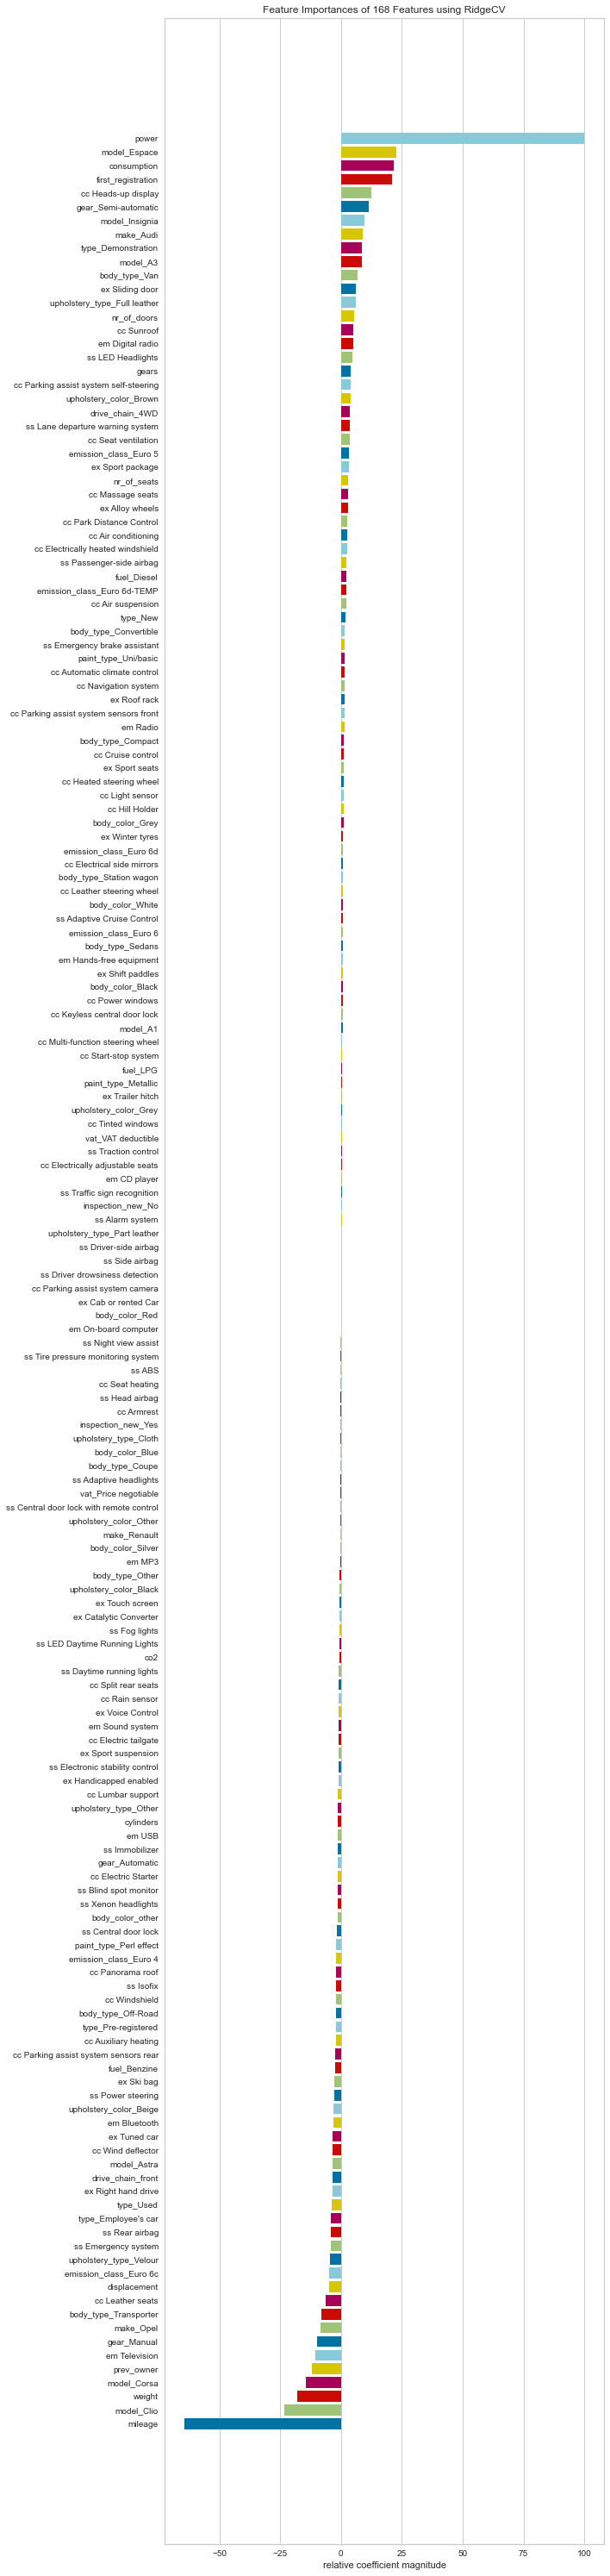

<AxesSubplot:title={'center':'Feature Importances of 168 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [149]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

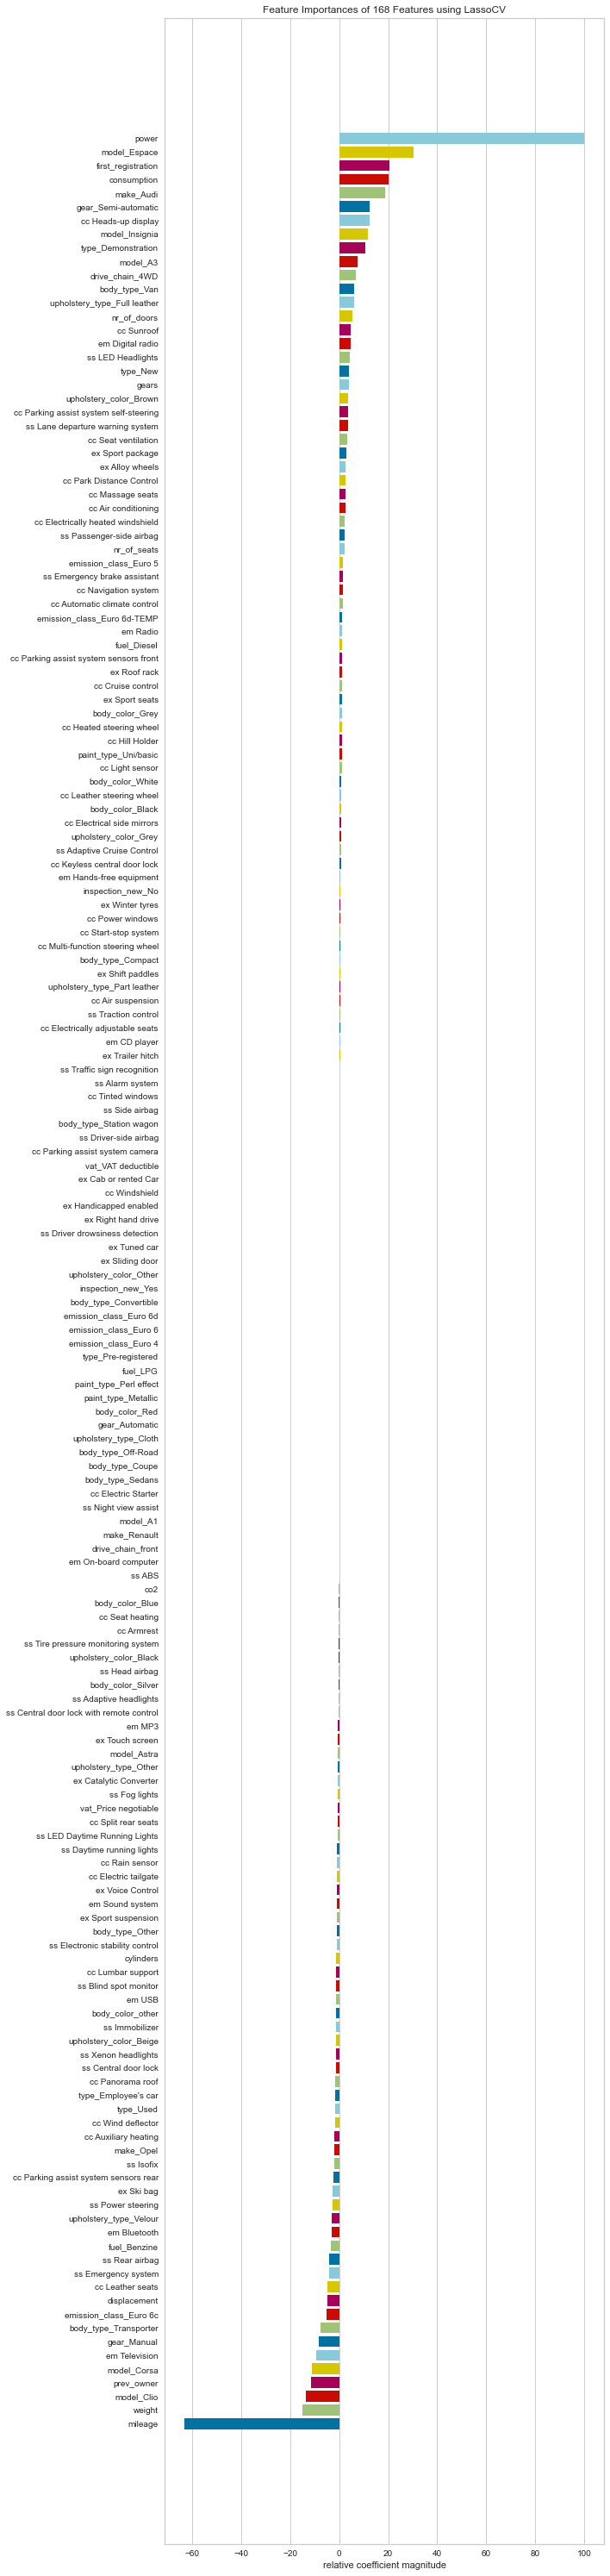

<AxesSubplot:title={'center':'Feature Importances of 168 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [150]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

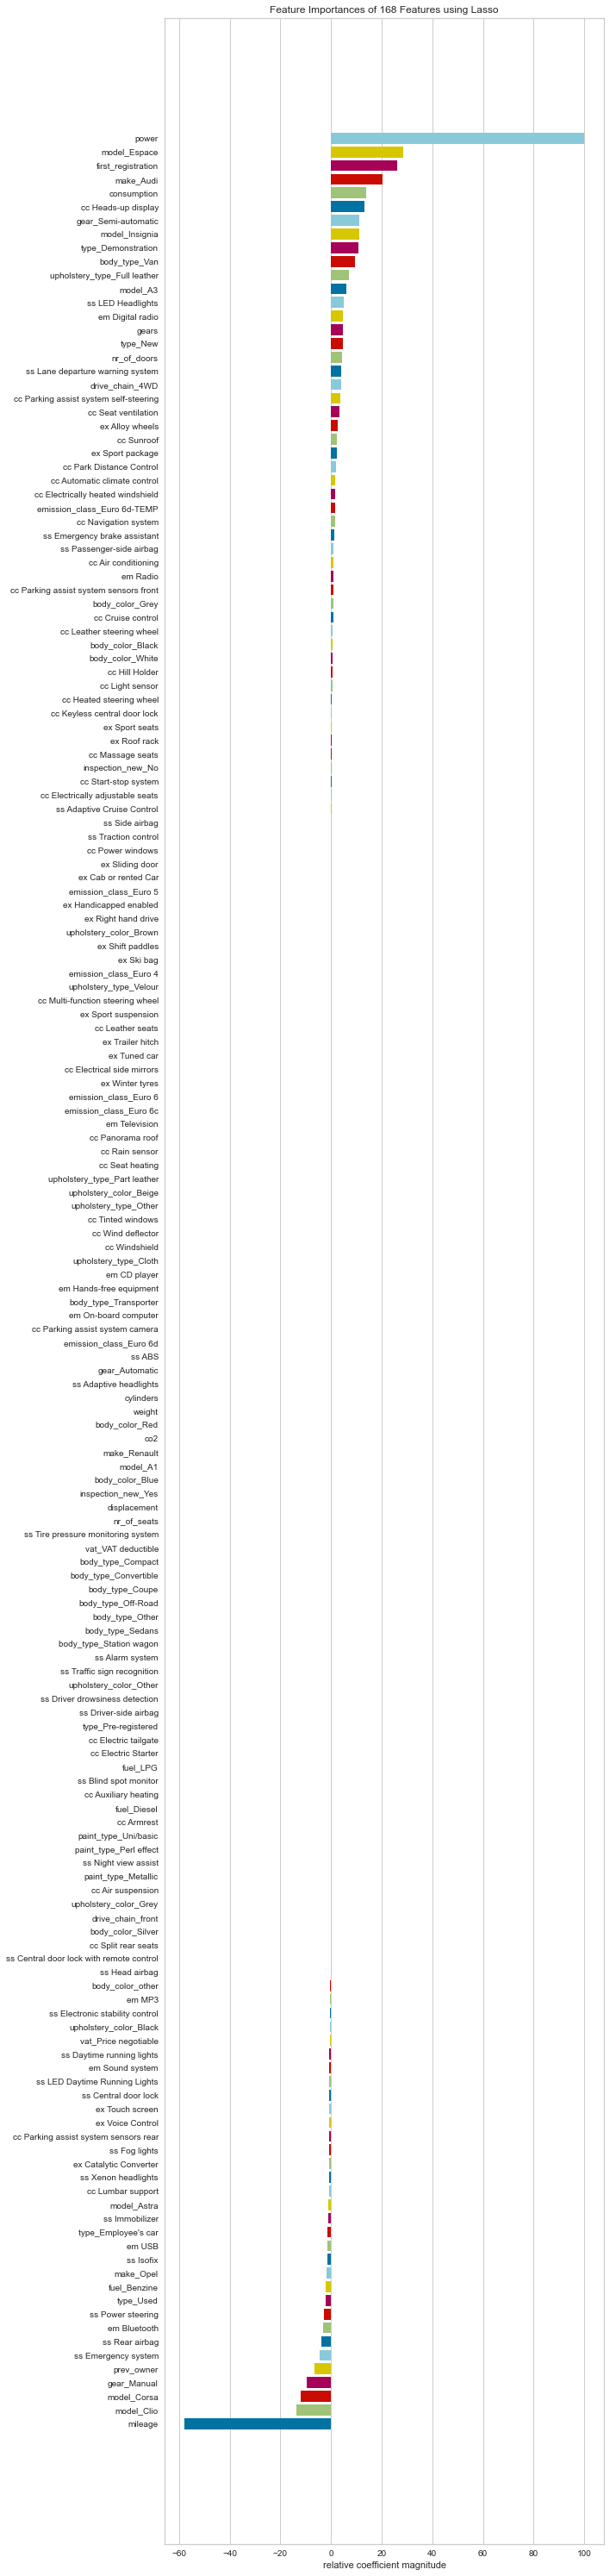

<AxesSubplot:title={'center':'Feature Importances of 168 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [1745]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(final_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

#### Random Forest Regression

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rf_model = RandomForestRegressor(random_state=2021)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_train_pred = rf_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "rf")

rf_train       rf_test
R2         0.993679  9.508254e-01
mae      330.479809  9.157602e+02
mse   335586.094475  2.846317e+06
rmse     579.297932  1.687103e+03

In [1748]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [1749]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [20, 25]
max_features = ['auto', 'sqrt']
max_depth = [20, 30]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

param_grid = random_grid

In [1750]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)
rf_random.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [1751]:
y_pred = rf_random.predict(X_test_scaled)
y_train_pred = rf_random.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "rf")

rf_train       rf_test
R2         0.992727  9.472443e-01
mae      347.697181  9.339825e+02
mse   386173.796880  3.053601e+06
rmse     621.428835  1.747455e+03

In [1752]:
from sklearn.model_selection import GridSearchCV

In [1753]:
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_train)
rf_grid.best_params_

Fitting 3 folds for each of 64 candidates, totalling 192 fits


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [1754]:
y_pred = rf_grid.predict(X_test_scaled)
y_train_pred = rf_grid.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "rf")

rf_train       rf_test
R2         0.989450  9.491469e-01
mae      425.317866  9.490005e+02
mse   560149.300014  2.943472e+06
rmse     748.431226  1.715655e+03

In [1755]:
best_rf = rf_grid.best_estimator_

y_pred = best_rf.predict(X_test_scaled)
y_train_pred = best_rf.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "rf")

rf_train       rf_test
R2         0.989450  9.491469e-01
mae      425.317866  9.490005e+02
mse   560149.300014  2.943472e+06
rmse     748.431226  1.715655e+03

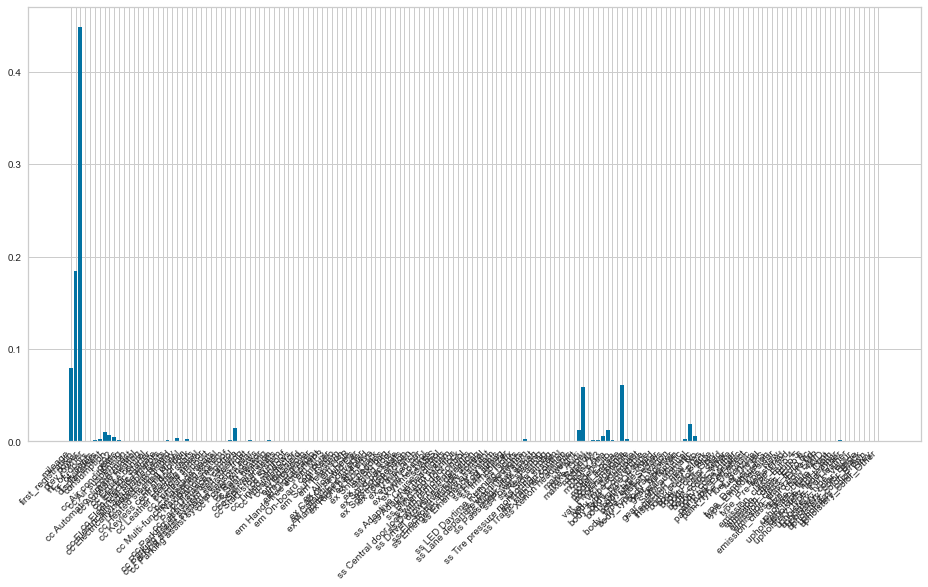

In [1756]:
importance = best_rf.feature_importances_

fig = plt.figure(figsize=(16, 8));
ax = fig.add_subplot(111)
plt.bar([x for x in (X.columns)], importance)
xticklabels = [x for x in (X.columns)]
plt.xticks(range(0, len(importance)))
ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
plt.show()

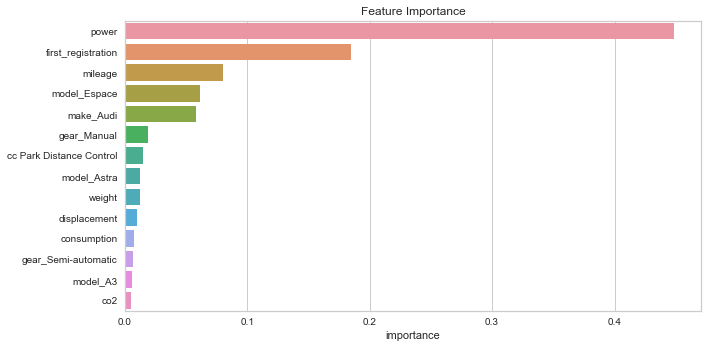

In [1757]:
importance = best_rf.feature_importances_
imp_df = pd.DataFrame(data = importance, index = X.columns, columns = ["importance"])
imp_df_short = imp_df[imp_df.importance > 0.005].sort_values("importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x = "importance", y = imp_df_short.index, data = imp_df_short, orient="horizontal");
plt.title("Feature Importance")
plt.tight_layout()

#### XGBoost Regression

In [159]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=2021) 
xgb_model.fit(X_train_scaled, y_train) 

y_pred = xgb_model.predict(X_test_scaled)
y_train_pred = xgb_model.predict(X_train_scaled)

train_val(y_train, y_train_pred, y_test, y_pred, "xgb")

xgb_train      xgb_test
R2    4.927179e-01 -1.366643e-01
mae   3.976423e+03  5.925848e+03
mse   2.822129e+07  5.908340e+07
rmse  5.312372e+03  7.686573e+03

#### Quick analysis with fewer features

In [153]:
df = pd.read_csv("final_no_dummies.csv")
df.head()

price  make model  mileage  first_registration  power  prev_owner  \
0  15770.0  Audi    A1    56013                2016     66           2   
1  14500.0  Audi    A1    80000                2017    141           1   
2  14640.0  Audi    A1    83450                2016     85           1   
3  14500.0  Audi    A1    73000                2016     66           1   
4  16790.0  Audi    A1    16200                2016     66           1   

                vat body_type       gear  nr_of_doors  nr_of_seats  cylinders  \
0    VAT deductible    Sedans  Automatic            5            5        3.0   
1  Price negotiable    Sedans  Automatic            3            4        4.0   
2    VAT deductible    Sedans  Automatic            4            4        3.0   
3  Price negotiable    Sedans  Automatic            3            4        3.0   
4  Price negotiable    Sedans  Automatic            5            5        3.0   

  inspection_new body_color paint_type     fuel  type emission_class  \
0            Yes      Black   Metallic   Diesel  Used         Euro 6   
1             No        Red   Metallic  Benzine  Used         Euro 6   
2             No      Black   Metallic   Diesel  Used         Euro 6   
3             No      other   Metallic   Diesel  Used         Euro 6   
4            Yes      Black   Metallic   Diesel  Used         Euro 6   

   displacement  consumption    co2  gears  cc Air conditioning  \
0        1422.0          4.2   99.0    5.0                    1   
1        1798.0          5.6  129.0    7.0                    1   
2        1598.0          4.2   99.0    5.0                    1   
3        1422.0          4.2   99.0    6.0                    0   
4        1422.0          4.1  109.0    5.0                    1   

   cc Air suspension  cc Armrest  cc Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc Auxiliary heating  cc Cruise control  cc Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc Electric tailgate  cc Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc Electrically adjustable seats  cc Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc Heads-up display  cc Heated steering wheel  cc Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc Keyless central door lock  cc Leather seats  cc Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2           

In [154]:
df_new = df[["make", "model", "mileage", "first_registration", "power", "body_type", 
             "gear", "weight", "displacement", "consumption", "co2", "cc Park Distance Control", "price"]]

In [155]:
df_new = pd.get_dummies(df_new)

In [156]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
xgb_model = XGBRegressor(random_state=101, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred, "xgb")

xgb_train      xgb_test
R2    9.790907e-01  9.443427e-01
mae   7.493158e+02  1.078021e+03
mse   1.163234e+06  2.893046e+06
rmse  1.078533e+03  1.700896e+03

Let us check cross validation for linear model one more time. With original data set, we had exploding rms values. Now, it looks good. The calculation became more stable even without scaling!

In [1776]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)
pd.DataFrame(scores, index=range(1, 6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.018808    0.004882  0.845707                  -2059.658193   
2  0.009337    0.003006  0.849684                  -2001.784051   
3  0.009375    0.002404  0.853643                  -2016.425802   
4  0.008080    0.002659  0.848508                  -1955.552790   
5  0.007493    0.001553  0.855528                  -1960.849370   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                -8.477495e+06                      -2911.613885  
2                -8.808485e+06                      -2967.909193  
3                -8.251325e+06                      -2872.511952  
4                -8.217289e+06                      -2866.581497  
5                -7.790013e+06                      -2791.059391